In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from fredapi import Fred
import fredpy as fp

fp.api_key = fp.load_api_key('cucumber.txt')








<IPython.core.display.Javascript object>


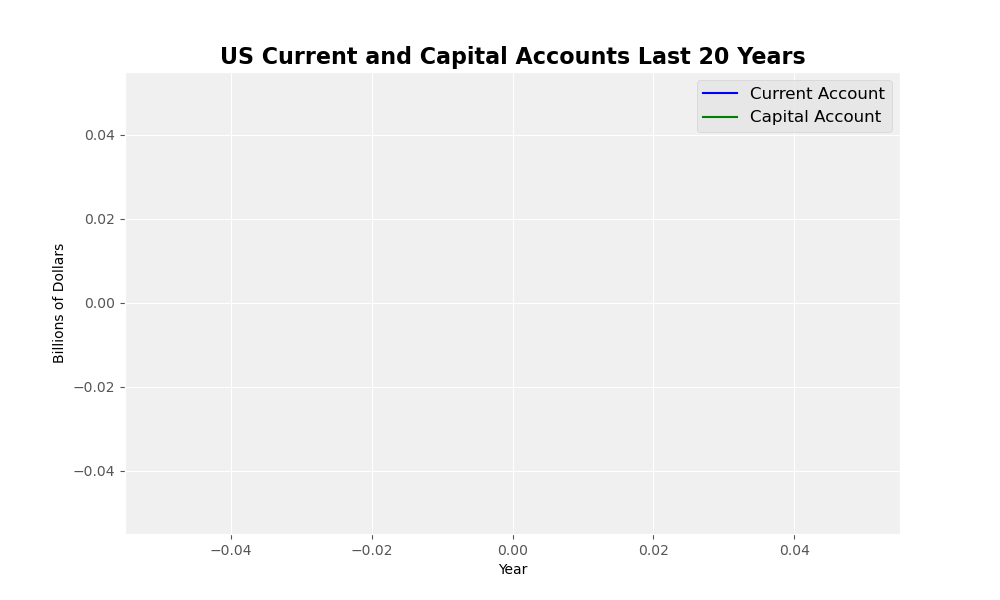

In [25]:
import os
import fredpy as fp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from fredapi import Fred
import fredpy as fp
%matplotlib nbagg
fp.api_key = fp.load_api_key('cucumber.txt')


# Initialize the FRED API client
fred = Fred(api_key=api_key)

# Define the series IDs we want to use
ca_id = 'NETFI'
ka_id = 'IEABC'

# Define the start and end dates for the data
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
start_date = (pd.Timestamp.today() - pd.DateOffset(years=20)).strftime('%Y-%m-%d')

# Get the data for the series
ca_data = fred.get_series(ca_id, start_date, end_date)
ka_data = fred.get_series(ka_id, start_date, end_date)

# Combine the data into a dataframe
data = pd.concat([ca_data, ka_data], axis=1, keys=['Current Account', 'Capital Account'])

# Define the plot style
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#F0F0F0')

# Define the title and axis labels
ax.set_title('US Current and Capital Accounts Last 20 Years', fontsize=16, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Billions of Dollars')

# Define the plot lines
ca_line, = ax.plot([], [], color='blue', label='Current Account')
ka_line, = ax.plot([], [], color='green', label='Capital Account')

# Define the legend
ax.legend(loc='upper right', fontsize=12)

# Define the animation function
def animate(i):
    # Get the data for the current frame
    frame_data = data.iloc[:i+1]
    x = frame_data.index
    ca_y = frame_data['Current Account']
    ka_y = frame_data['Capital Account']

    # Update the plot lines
    ca_line.set_data(x, ca_y)
    ka_line.set_data(x, ka_y)

    return ca_line, ka_line,

# Define the animation object
ani = animation.FuncAnimation(fig, animate, frames=len(data), interval=200, blit=True)

# Display the animation
plt.show()




In [ ]:
import fredpy as fp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Set up the FRED API key
fp.api_key = fp.load_api_key('cucumber.txt')


# Define the series IDs we want to fetch
series_ids = ['GDPC1', 'GDPDEF', 'UNRATE', 'PAYEMS']

# Fetch the data and create the dataframes
data = pd.to_dict(fp.series(series_ids)
df = pd.DataFrame(data)

# Create the figure and axis for the chart
fig, ax = plt.subplots()
df.plot(ax=ax)

# Set the title and axis labels
ax.set_title('US Economic Indicators')
ax.set_xlabel('Year')
ax.set_ylabel('Value')

# Show the legend at the bottom
ax.legend(loc='lower center', ncol=len(df.columns))

# Show the chart
plt.show()

In [10]:
import fredapi
import pandas as pd
from datetime import datetime, timedelta
from fredapi import Fred
import fredpy as fp

fp.api_key = fp.load_api_key('cucumber.txt')


# Set up the FRED API client
fred = Fred(api_key=fp.api_key)

# Set up the date ranges
end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)

# Get the data from FRED
data = fred.get_series('OBFRVOL', start_date, end_date)

# Convert the data to a dataframe
df = pd.DataFrame(data, columns=['Balance of Payments'])

# Print the dataframe
print(df)


            Balance of Payments
2018-04-09                153.0
2018-04-10                155.0
2018-04-11                156.0
2018-04-12                160.0
2018-04-13                144.0
...                         ...
2023-03-30                240.0
2023-03-31                175.0
2023-04-03                261.0
2023-04-04                263.0
2023-04-05                255.0

[1303 rows x 1 columns]


In [11]:
df.to_csv("BOP.csv")

In [32]:
import pandas as pd
from fredapi import Fred

# Set up the FRED API key
fp.api_key = fp.load_api_key('cucumber.txt')

fred = Fred(api_key=fp.api_key)

def get_latest_series():
    # Retrieve the 100 most recently updated series
    latest_series = fred.get_series(sort_order='desc', order_by='observation_end', limit=25)

    # Get the 25 most recent series by observation end date
    latest_series = latest_series.sort_values(by='observation_end', ascending=False).head(25)

    # Return the list of series IDs
    return latest_series.index.tolist()
get_latest_series()

TypeError: Fred.get_series() missing 1 required positional argument: 'series_id'

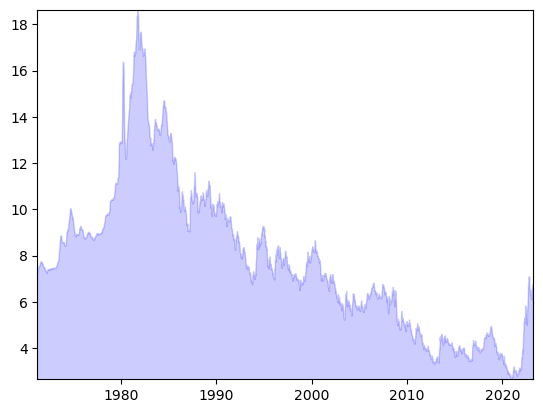

In [19]:
#this code creates a fill_between chart 

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from fredapi import Fred
import fredpy as fp

fp.api_key = fp.load_api_key('cucumber.txt')

#api_key = fp.api_key

def animate_mortgage30us(api_key):
    # Initialize FRED API client
    fred = Fred(api_key=api_key)

    # Fetch data for MORTGAGE30US series
    data = fred.get_series('MORTGAGE30US')

    # Create figure and axis
    fig, ax = plt.subplots()
    ax.set_xlim([data.index[0], data.index[-1]])
    ax.set_ylim([data.min(), data.max()])

    # Create line and fill between objects
    line, = ax.plot([], [])
    fill = ax.fill_between(data.index, data, color='blue', alpha=0.2)

    # Define update function for animation
    def update(i):
        line.set_data(data[:i].index, data[:i].values)
        return (line,)

    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=len(data), interval=100, blit=True)

    # Show plot
    plt.show()
animate_mortgage30us(api_key)

In [20]:
import requests
import xml.etree.ElementTree as ET
import fredpy as fp

# Set API key and search text
fp.api_key = fp.load_api_key('cucumber.txt')

#api_key = str("bb93e6af041f1b12ceef4f949f5abd4d")
search_text = "interest rate policy"

# Build URL for API call
url = f"https://api.stlouisfed.org/fred/series/search?search_text={search_text}&api_key={api_key}"

# Send GET request to API endpoint
response = requests.get(url)

# Parse response XML into ElementTree object
root = ET.fromstring(response.content)

# Print XML tree to console
ET.dump(root)
# Save XML response to file
with open("fred_search_results2.xml", "wb") as f:
    f.write(response.content)


<seriess realtime_start="2023-04-06" realtime_end="2023-04-06" order_by="search_rank" sort_order="desc" count="30" offset="0" limit="1000">
  <series id="FEDFUNDS" realtime_start="2023-04-06" realtime_end="2023-04-06" title="Federal Funds Effective Rate" observation_start="1954-07-01" observation_end="2023-03-01" frequency="Monthly" frequency_short="M" units="Percent" units_short="%" seasonal_adjustment="Not Seasonally Adjusted" seasonal_adjustment_short="NSA" last_updated="2023-04-03 15:18:02-05" popularity="98" group_popularity="99" notes="Averages of daily figures.   For additional historical federal funds rate data, please see  Daily Federal Funds Rate from 1928-1954 (https://fred.stlouisfed.org/categories/33951).  The federal funds rate is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight. When a depository institution has surplus balances in its reserve account, it lends to other banks in need

In [17]:
import fredpy as fp

fp.api_key = fp.load_api_key('cucumber.txt')



# Function using fredapi
def test_fredapi(api_key):
    from fredapi import Fred

    # Initialize FRED API client
    fred = Fred(api_key=api_key)

    try:
        # Test API call by fetching series data for GDP
        data = fred.get_series("GDP")
        print(f"API access using fredapi successful. Fetched {len(data)} observations for GDP series.")
        return True
    except Exception as e:
        print(f"API access using fredapi failed with exception: {e}")
        return False

#Function using Fredpy
def test_fredpy(api_key):
    import fredapi

    # Initialize FRED API client
    fred = fredapi.Fred(api_key=api_key)

    try:
        # Test API call by fetching series data for GDP
        data = fred.get_series("GDP")
        data.to_csv("successfullscreen.txt")
        print(f"API access using fredpy successful. Fetched {len(data)} observations for GDP series.")
        return True
    except Exception as e:
        print(f"API access using fredpy failed with exception: {e}")
        return False


    
test_fredapi(api_key)
test_fredpy(api_key)

API access using fredapi successful. Fetched 308 observations for GDP series.
API access using fredpy successful. Fetched 308 observations for GDP series.


True

In [8]:
data.to_csv("results.csv")

NameError: name 'data' is not defined